In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "" 
os.environ['KAGGLE_KEY'] = ""
!kaggle datasets download -d asdasdasasdas/garbage-classification

 88% 72.0M/82.0M [00:01<00:00, 40.4MB/s]
100% 82.0M/82.0M [00:01<00:00, 62.9MB/s]


In [0]:
from zipfile import *
zip_ref = ZipFile('garbage-classification.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [72]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(64, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))

# Adding a second convolutional layer

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Garbage_classification/Garbage_classification',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Garbage_classification/Garbage_classification',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

classifier.fit_generator(training_set,
                         steps_per_epoch = 500,
                         epochs = 3,
                         validation_data = None,
                         validation_steps = None)

Found 2527 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.
Epoch 1/3
500/500 [==============================] - 60s 119ms/step - loss: 0.9659 - acc: 0.6359
Epoch 2/3
500/500 [==============================] - 57s 113ms/step - loss: 0.1816 - acc: 0.9440
Epoch 3/3
500/500 [==============================] - 56s 113ms/step - loss: 0.0759 - acc: 0.9817


In [59]:
generator= train_datagen.flow_from_directory('Garbage_classification/Garbage_classification', batch_size=32)
label_map = (generator.class_indices)
label_map

Found 2527 images belonging to 6 classes.


{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [0]:
classifier.save('garbage_classifier.h5')


[2]
------------PREDICTION--------------

THIS TRASH IS :  METAL

------------------------------------


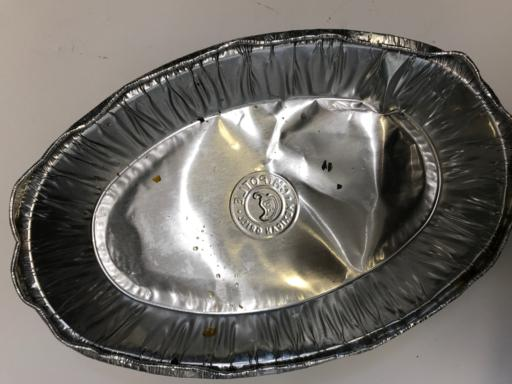

In [78]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('garbage_classifier.h5')
'''
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
'''
imageee = 'Garbage_classification/Garbage_classification/metal/metal120.jpg'
img = cv2.imread(imageee)
img = cv2.resize(img,(256,256))
img = np.reshape(img,[1,256,256,3])

classes = model.predict_classes(img)
probabilities = model.predict_proba(img)
print(classes)
if classes == [[0]]:
  pred = 'CARDBOARD'
elif classes == [[1]]:
  pred = 'GLASS'
elif classes == [[2]]:
  pred = 'METAL'
elif classes == [[3]]:
  pred = 'PAPER'
elif classes == [[5]]:
  pred = 'PLASTIC'
else:
  pred = 'TRASH'
  probabilities = 1 - probabilities



print("------------PREDICTION--------------")
print()
print("THIS TRASH IS : ",pred)
print()
print("------------------------------------")

from google.colab.patches import cv2_imshow
cvimg = cv2.imread(imageee)
cv2_imshow(cvimg)